<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Online_sales_datasets_Untitled16ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Details**

In [ ]:
data=pd.read_csv("/content/Details.csv")
data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


In [4]:
data.isna().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


**Order**

In [ ]:
data1=pd.read_csv("/content/Orders.csv")
data1

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [9]:
data1.isna().sum()

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0


In [10]:
data1.duplicated().sum()

np.int64(0)

**Marge Two Datasets**

In [ ]:
df=pd.merge(data,data1, on='Order ID', how='left')
df.head()

In [12]:
df.shape

(1500, 11)

In [13]:
print(f"Number of column: {df.shape[1]}\nNumber of rows: {df.shape[0]}")

Number of column: 11
Number of rows: 1500


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
 7   Order Date    1500 non-null   object
 8   CustomerName  1500 non-null   object
 9   State         1500 non-null   object
 10  City          1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB


In [15]:
df.isnull().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0
Order Date,0
CustomerName,0
State,0


In [16]:
df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


**Delete unnecessary columns**

In [17]:
df.drop(columns=['Order ID','Order Date'],inplace=True)
df.head()

,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,CustomerName,State,City
0,1096,658,7,Electronics,Electronic Games,COD,Bhawna,Madhya Pradesh,Indore
1,5729,64,14,Furniture,Chairs,EMI,Harivansh,Uttar Pradesh,Mathura
2,2927,146,8,Furniture,Bookcases,EMI,Shiva,Maharashtra,Pune
3,2847,712,8,Electronics,Printers,Credit Card,Sarita,Maharashtra,Pune
4,2617,1151,4,Electronics,Phones,Credit Card,Vrinda,Maharashtra,Pune


In [18]:
print(f"Number of column: {df.shape[1]}\nNumber of rows: {df.shape[0]}")

Number of column: 9
Number of rows: 1500


**Visualization**

In [19]:
df['Category'].nunique()

3

In [20]:
category = df['Category'].value_counts()
category

,count
Category,
Clothing,949
Electronics,308
Furniture,243


**Category**

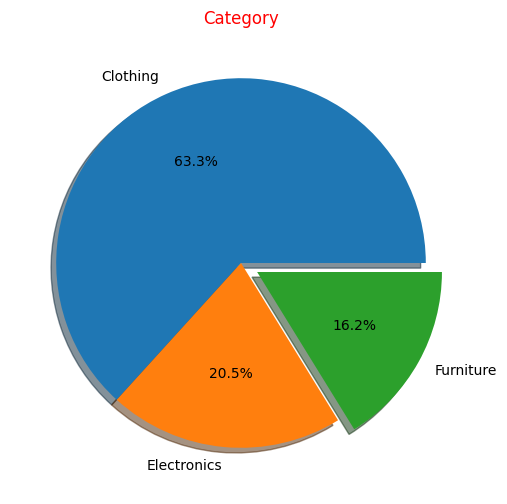

In [78]:
plt.figure(figsize=(6,6))
plt.pie(
    category.values,
    labels=['Clothing','Electronics','Furniture'],
    autopct='%1.1f%%',
    explode=(0,0,0.1),
    shadow=True)
plt.title("Category",fontsize=12,color="red")
plt.show()

**Sub-Category**

In [ ]:
df['Sub-Category'].nunique()

17

In [23]:
sub=df['Sub-Category'].value_counts()
sub

,count
Sub-Category,
Saree,211
Hankerchief,197
Stole,192
Phones,83
Electronic Games,79
Bookcases,79
T-shirt,77
Printers,74
Chairs,74


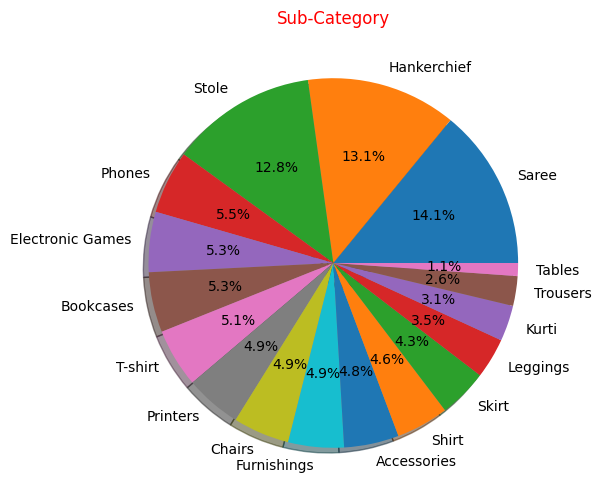

In [28]:
plt.figure(figsize=(6,6))
plt.pie(sub.values,labels=sub.index,autopct="%1.1f%%",shadow=True)
plt.title("Sub-Category",fontsize=12,color="Red")
plt.show()

**Payment Mode**

In [26]:
df['PaymentMode'].nunique()

5

In [27]:
payment=df['PaymentMode'].value_counts()
payment

,count
PaymentMode,
COD,684
UPI,331
Debit Card,202
Credit Card,163
EMI,120


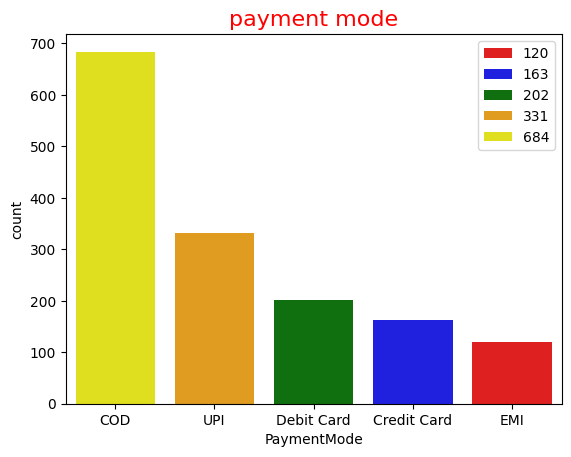

In [66]:
sns.barplot(x=payment.index,y=payment.values,palette=['red','blue','green','orange','yellow'],hue=payment.values)
plt.title("payment mode",color='red',fontsize=16)
plt.xlabel('PaymentMode')
plt.ylabel('count')
plt.show()

**State**

In [39]:
df['State'].nunique()

19

In [40]:
state=df['State'].value_counts()
state

,count
State,
Madhya Pradesh,314
Maharashtra,299
Uttar Pradesh,87
Gujarat,87
Delhi,76
Rajasthan,74
West Bengal,63
Bihar,62
Punjab,60


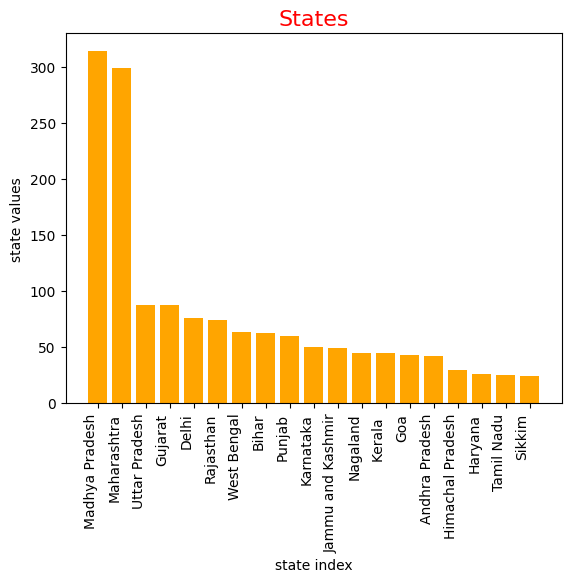

In [65]:
plt.bar(state.index,state.values,color='orange')
plt.title("States",color='red',fontsize=16)
plt.xlabel("state index")
plt.ylabel("state values")
plt.xticks(rotation=90,ha='right')
plt.show()

**City**

In [56]:
df['City'].nunique()

25

In [57]:
city=df['City'].value_counts()
city

,count
City,
Indore,248
Mumbai,201
Pune,98
Delhi,76
Chandigarh,71
Bhopal,66
Kolkata,63
Ahmedabad,62
Patna,62


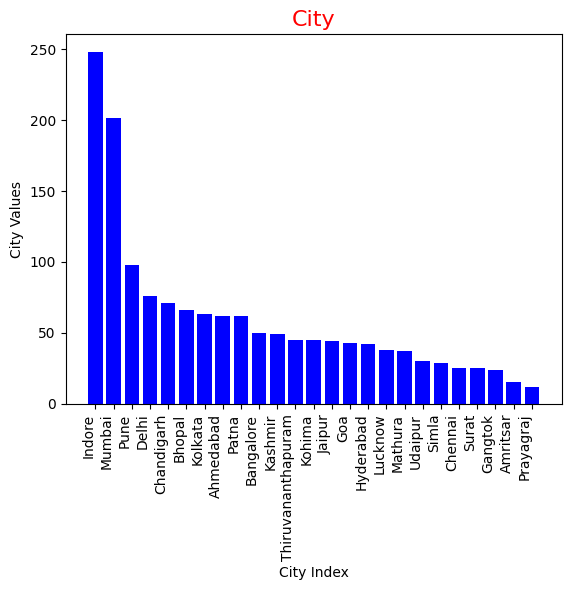

In [64]:
plt.bar(city.index,city.values,color='blue')
plt.title("City",color='red',fontsize=16)
plt.xlabel('City Index')
plt.ylabel('City Values')
plt.xticks(rotation=90,ha='right')

plt.show()